In [2]:
#| echo: false
from myutils.functions import question_box, list_to_html

# Previous steps

In [47]:
import pandas as pd
data_file = 'data/data.csv'
df = pd.read_csv(data_file)
cleaned_df = df.drop('VOYAGEID2',axis=1).dropna(subset=['Captives arrived at 1st port']).fillna("unknown")
cleaned_col_names = cleaned_df.columns
cleaned_df.head(10)

,Year of arrival at port of disembarkation,Voyage ID,Vessel name,Voyage itinerary imputed port where began (ptdepimp) place,Voyage itinerary imputed principal place of slave purchase (mjbyptimp),Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place,Captives arrived at 1st port,Captain's name
0,1714.0,16109,Freeke Gally,Bristol,unknown,Kingston,283.0,"Neale, Alexander"
2,1714.0,16111,Jacob,Bristol,unknown,Kingston,130.0,"Nicholls, Philip"
3,1714.0,16112,Jason Gally,Bristol,unknown,Port Royal,278.0,"Plummer, John"
5,1714.0,16114,Mercy Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",190.0,"Scott, John"
6,1714.0,16115,Mermaid Gally,Bristol,Cape Verde Islands,Kingston,72.0,"Banbury, John<br/> Copinger, James"
8,1714.0,16117,Peterborough,Bristol,"Africa, port unspecified","Barbados, place unspecified",200.0,"Shawe, John<br/> Martin, Joseph"
9,1713.0,16118,Resolution,Bristol,"Gold Coast, port unspecified","Barbados, place unspecified",255.0,"Williams, Charles"
10,1714.0,16119,Richard and William,Bristol,unknown,Port Royal,55.0,"Beckham, George<br/> Spring, Martin"
11,1713.0,16120,Rotchdale Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",96.0,"Hitchings, John"
12,1714.0,16121,Tunbridge Gally,Bristol,"Africa, port unspecified","Barbados, place unspecified",200.0,"Skinner, Peter"


In [14]:
print("Index) Column name") 
for i,name in enumerate(cleaned_df.columns): 
    print(i,")",name) 

Index) Column name
0 ) Year of arrival at port of disembarkation
1 ) Voyage ID
2 ) Vessel name
3 ) Voyage itinerary imputed port where began (ptdepimp) place
4 ) Voyage itinerary imputed principal place of slave purchase (mjbyptimp) 
5 ) Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place
6 ) Captives arrived at 1st port
7 ) Captain's name


# Data Analysis

It is finally time to ask questions to our data

In [36]:
arrival_year = cleaned_df.iloc[:,0]
first_year = min(arrival_year)
last_year = max(arrival_year)
year_span = last_year-first_year

print(first_year)
print(last_year)
print(year_span)

1520.0
1866.0
346.0


In [44]:
n_captives = cleaned_df.iloc[:,6]
tot_captives = sum(n_captives)
ave_cap_per_voyage = sum(n_captives)/len(cleaned_df)
print('Total n. of captives:',tot_captives)
print('Average captives per voyage',round(ave_cap_per_voyage))

Total n. captive: 5082756.0
Average captives per voyage 276


In [58]:
filtered_rows = len(df)-len(cleaned_df)
tot_captives_ext = tot_captives + ave_cap_per_voyage*filtered_rows
print('Extimated total n. of captives',round(tot_captives_ext))

Extimated total n. of captives 9981894


In [37]:
start_port = cleaned_df.iloc[:,3]
start_port_counts = start_port.value_counts()
print(type(start_port_counts))
start_port_counts

<class 'pandas.core.series.Series'>


Voyage itinerary imputed port where began (ptdepimp) place
Liverpool                       3227
unknown                         2005
London                          1874
Bahia, place unspecified        1815
Rio de Janeiro                  1464
                                ... 
Mangaratiba                        1
Mediterranean coast (France)       1
Canasí                             1
Santa Catarina                     1
Portland                           1
Name: count, Length: 176, dtype: int64

<Axes: xlabel='count', ylabel='Voyage itinerary imputed port where began (ptdepimp) place'>

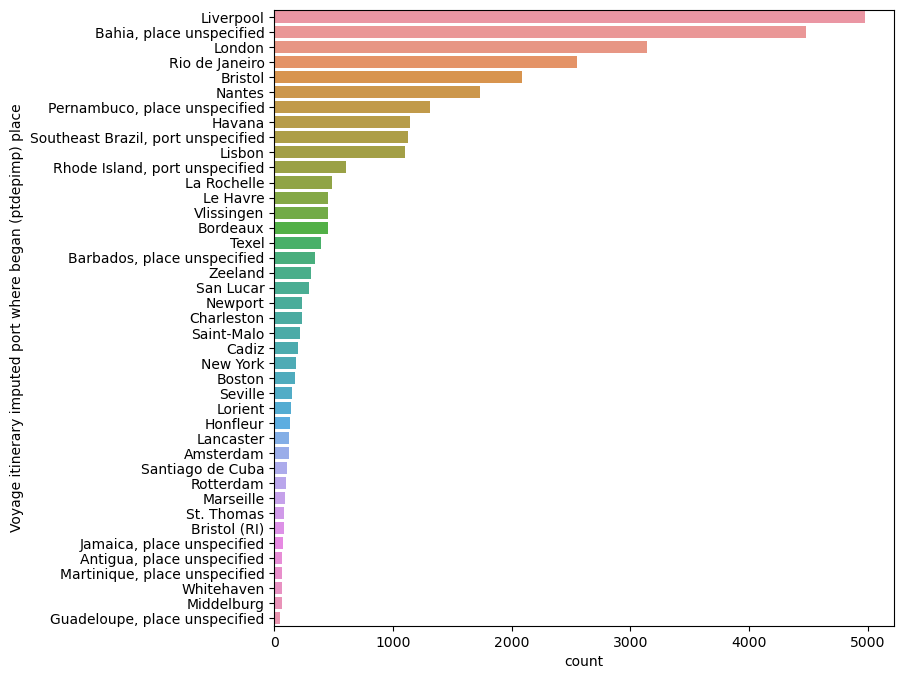

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = start_port_counts > 50
sns.barplot(ax=ax,x=start_port_counts[filter],y=start_port_counts.index[filter])

In [33]:
main_pur_port = cleaned_df.iloc[:,4]
main_pur_counts = main_pur_port.value_counts()
main_pur_counts

Voyage itinerary imputed principal place of slave purchase (mjbyptimp) 
Africa, port unspecified                                3177
Luanda                                                  1447
West Central Africa and St. Helena, port unspecified    1139
Bonny                                                    853
Gold Coast, port unspecified                             787
                                                        ... 
Petit Mesurado                                             1
Eva                                                        1
Pokesoe (Princes Town)                                     1
Sassandra                                                  1
Sugary (Siekere)                                           1
Name: count, Length: 161, dtype: int64

<Axes: xlabel='count', ylabel='Voyage itinerary imputed principal place of slave purchase (mjbyptimp) '>

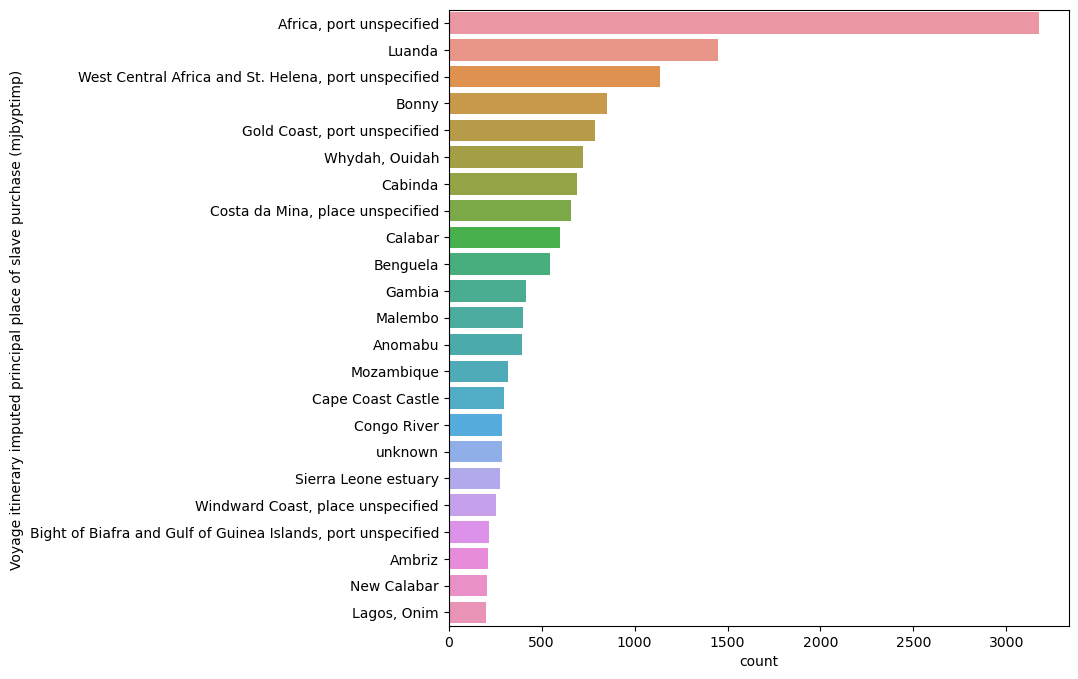

In [34]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = main_pur_counts > 200
sns.barplot(ax=ax,x=main_pur_counts[filter],y=main_pur_counts.index[filter])

In [35]:
main_dis_port = cleaned_df.iloc[:,5]
main_dis_counts = main_dis_port.value_counts()
main_dis_counts

Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place
Bahia, place unspecified       1720
Rio de Janeiro                 1651
Kingston                       1576
Barbados, place unspecified    1524
Havana                          893
                               ... 
France, place unspecified         1
Santa Marta                       1
Dois Rios                         1
Maceió                            1
Bonny                             1
Name: count, Length: 240, dtype: int64

<Axes: xlabel='count', ylabel='Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place'>

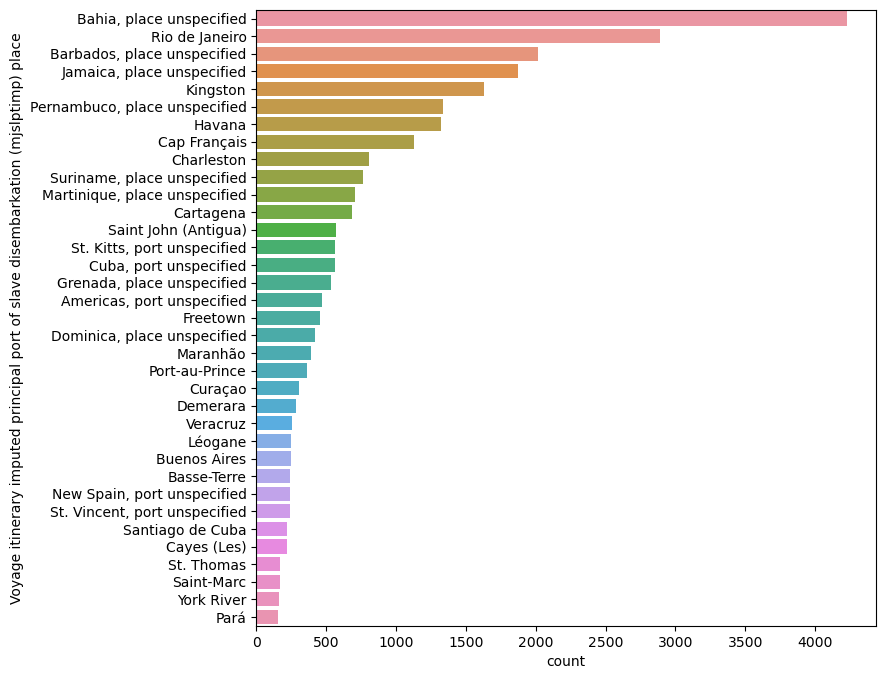

In [26]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
filter = main_dis_counts > 150
sns.barplot(ax=ax,x=main_dis_counts[filter],y=main_dis_counts.index[filter])

In [48]:
cleaned_df.columns

Index(['Year of arrival at port of disembarkation', 'Voyage ID', 'Vessel name',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'Captives arrived at 1st port', 'Captain's name'],
      dtype='object')

In [50]:
col_to_group = 'Year of arrival at port of disembarkation'
col_to_average = 'Captives arrived at 1st port'
average_df_per_year = df.groupby(col_to_group)[col_to_average].mean()
print(average_df_per_year.shape)
average_df_per_year

(337,)


Year of arrival at port of disembarkation
1514.0           NaN
1516.0           NaN
1519.0           NaN
1520.0     44.000000
1526.0     57.500000
             ...    
1862.0    671.000000
1863.0    612.636364
1864.0    471.142857
1865.0    397.500000
1866.0    700.000000
Name: Captives arrived at 1st port, Length: 337, dtype: float64

/Users/xizg0003/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/xizg0003/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year of arrival at port of disembarkation', ylabel='Captives arrived at 1st port'>

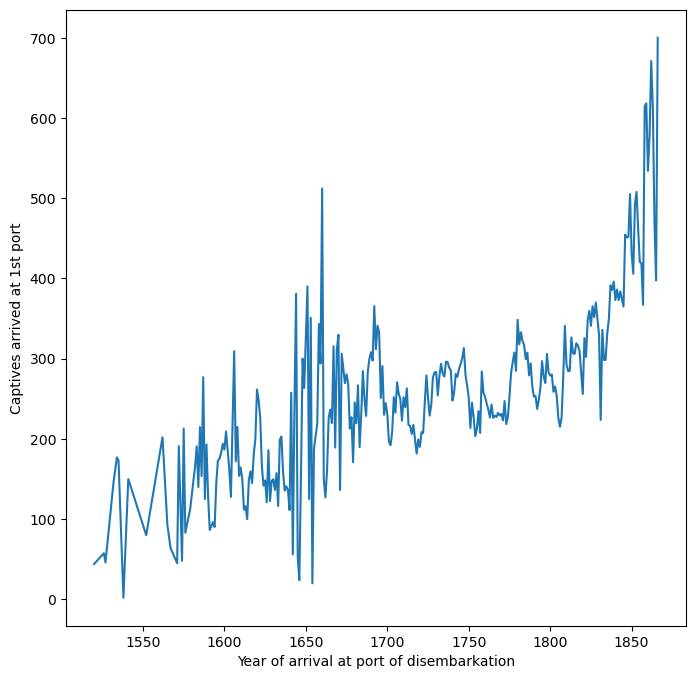

In [56]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.lineplot(ax=ax,x=average_df_per_year.index,y=average_df_per_year)

In [46]:
ship_names = cleaned_df.iloc[:,2]
unique_ship_names = ship_names.unique()
print(len(unique_ship_names))
print(unique_ship_names)

5826
['Freeke Gally' 'Jacob' 'Jason Gally' ... 'Yannemerais' 'Dobson'
 'Bela União']
